In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [32]:
# Load the data from the heatmap
data = pd.read_csv('data_hm.csv')
df = pd.DataFrame(data)

In [33]:
df

,category,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,00:00-05:59,291,216,198,212,219,219,301
1,06:00-11:59,254,312,273,262,269,284,251
2,12:00-17:59,440,507,443,525,474,496,468
3,18:00-23:59,380,430,444,426,456,492,461


In [34]:
# Display basic statistics
stats = df.describe()
stats

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,341.250000,366.250000,339.500000,356.250000,354.500000,372.750000,370.250000
std,84.440808,128.313094,123.931433,144.951429,129.425654,142.509356,110.765142
min,254.000000,216.000000,198.000000,212.000000,219.000000,219.000000,251.000000
25%,281.750000,288.000000,254.250000,249.500000,256.500000,267.750000,288.500000
50%,335.500000,371.000000,358.000000,344.000000,362.500000,388.000000,381.000000
75%,395.000000,449.250000,443.250000,450.750000,460.500000,493.000000,462.750000
max,440.000000,507.000000,444.000000,525.000000,474.000000,496.000000,468.000000


In [35]:
min_val = 198
max_val = 507

# Calculate the interquartile range
range_val = max_val - min_val

# Quartiles
q1 = min_val + range_val * 0.25
q2 = min_val + range_val * 0.50
q3 = min_val + range_val * 0.75

print("Low Range:", min_val, "to", q1)
print("Medium Range:", q1, "to", q2)
print("High Range:", q2, "to", q3)
print("Extreme Range:", q3, "to", max_val)


Low Range: 198 to 275.25
Medium Range: 275.25 to 352.5
High Range: 352.5 to 429.75
Extreme Range: 429.75 to 507


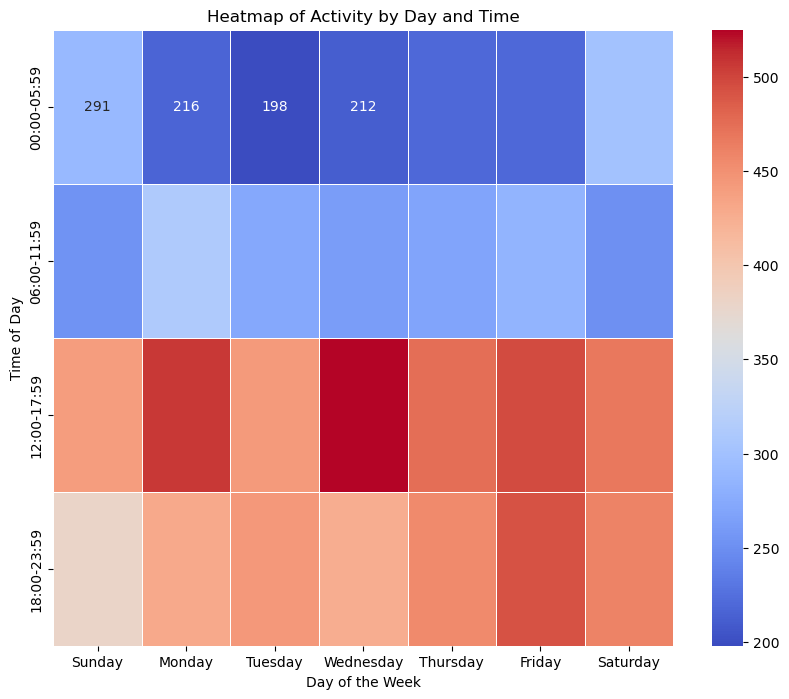

In [36]:
#Plot a heatmap with seaborn

df.set_index('category', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Heatmap of Activity by Day and Time')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.savefig("heatmap_sb")


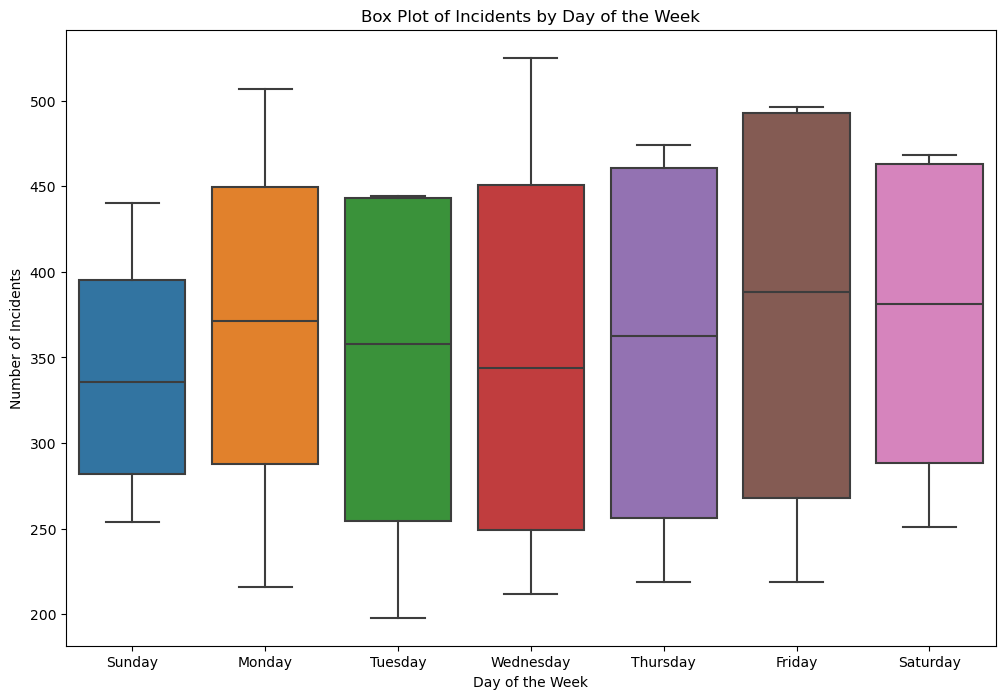

In [37]:
#Box plots

df = pd.DataFrame(data)
df.set_index('category', inplace=True)

# Convert the DataFrame from wide to long format
df_long = df.reset_index().melt(id_vars='category', var_name='Day', value_name='Incidents')

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Day', y='Incidents',data=df_long)
plt.title('Box Plot of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.savefig("Incidents_day_week")


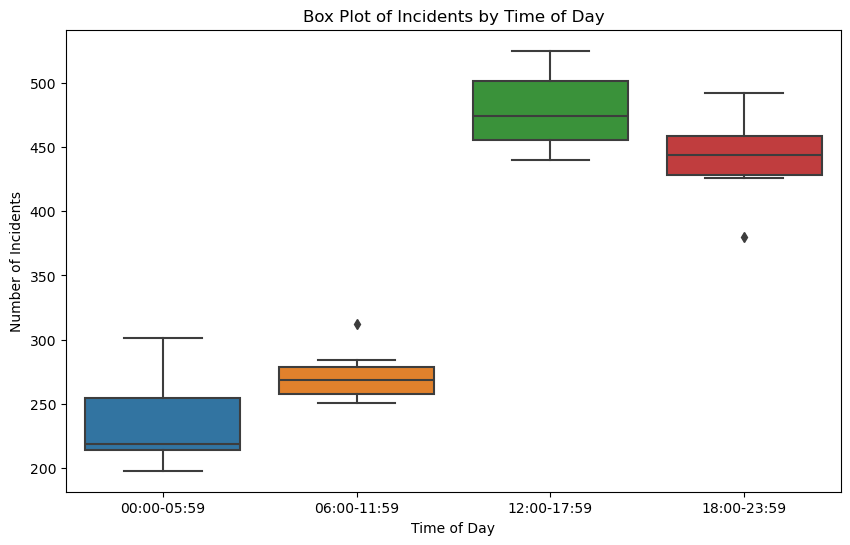

In [38]:
df = pd.DataFrame(data)

# Step 1: Melt the DataFrame to long format
df_long = df.melt(id_vars='category', var_name='Day', value_name='Incidents')

# Step 2: Aggregate data by category, ignoring the specific days
aggregated_data = df_long.groupby('category')['Incidents'].apply(list).reset_index()

# Step 3: Explode the list to separate rows for plotting
exploded_data = aggregated_data.explode('Incidents')

# Convert 'Incidents' to numeric (if necessary)
exploded_data['Incidents'] = pd.to_numeric(exploded_data['Incidents'])

# Step 4: Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='Incidents', data=exploded_data)
plt.title('Box Plot of Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.savefig("Incidents_timeofday.png")
plt.show()


In [39]:
#projection

In [40]:
# Fetch data from API endpoint
url = 'http://127.0.0.1:5000/data'    
response = requests.get(url)
data = response.json()

# Convert JSON data to DataFrame
df_forecast = pd.DataFrame(data)

# Display the column names to verify them
print(df_forecast.columns)


Index(['Analysis Neighborhood', 'Incident Category', 'Incident Date',
       'Incident Datetime', 'Incident Day of Week', 'Incident Description',
       'Incident Subcategory', 'Incident Time', 'Incident Year', 'Latitude',
       'Longitude', 'Neighborhoods', 'Resolution'],
      dtype='object')


In [42]:
len(df_forecast)

503415

20:29:06 - cmdstanpy - INFO - Chain [1] start processing
20:29:06 - cmdstanpy - INFO - Chain [1] done processing


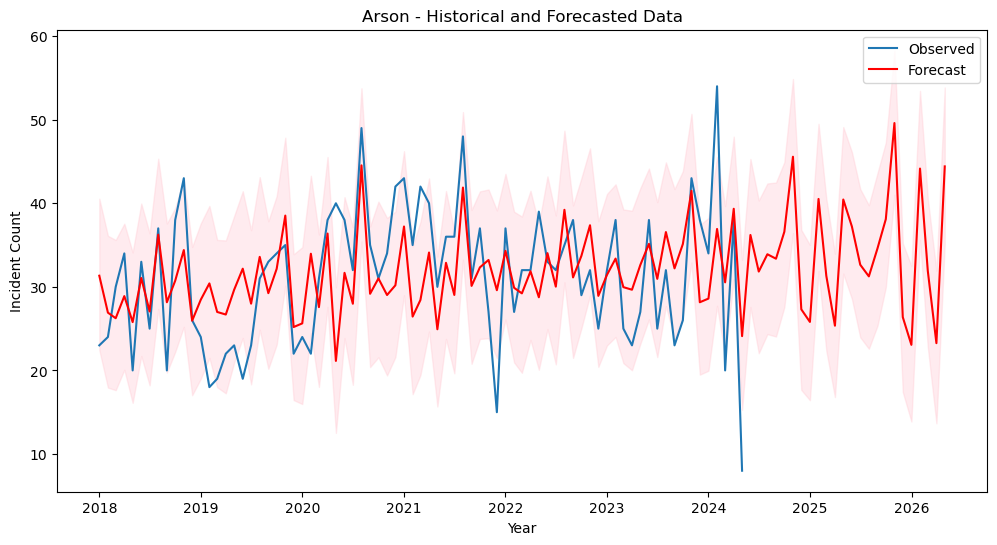

  0%|          | 0/7 [00:00<?, ?it/s]

20:29:07 - cmdstanpy - INFO - Chain [1] start processing
20:29:12 - cmdstanpy - INFO - Chain [1] done processing
20:29:12 - cmdstanpy - INFO - Chain [1] start processing
20:29:19 - cmdstanpy - INFO - Chain [1] done processing
20:29:19 - cmdstanpy - INFO - Chain [1] start processing
20:29:19 - cmdstanpy - INFO - Chain [1] done processing
20:29:19 - cmdstanpy - INFO - Chain [1] start processing
20:29:20 - cmdstanpy - INFO - Chain [1] done processing
20:29:20 - cmdstanpy - INFO - Chain [1] start processing
20:29:20 - cmdstanpy - INFO - Chain [1] done processing
20:29:20 - cmdstanpy - INFO - Chain [1] start processing
20:29:20 - cmdstanpy - INFO - Chain [1] done processing
20:29:20 - cmdstanpy - INFO - Chain [1] start processing
20:29:20 - cmdstanpy - INFO - Chain [1] done processing
20:29:20 - cmdstanpy - INFO - Chain [1] start processing
20:29:20 - cmdstanpy - INFO - Chain [1] done processing


     horizon        mae         mse      mape
0    79 days   8.672764  142.631883  0.336748
1    81 days   9.034777  146.660193  0.338763
2    85 days   9.353953  152.921137  0.340227
3    86 days   8.288818  132.014853  0.311755
4    90 days   8.587277  134.073193  0.323685
..       ...        ...         ...       ...
148 719 days  17.529923  395.421517  0.627280
149 723 days  16.683395  362.117330  0.599160
150 724 days  16.819023  365.913955  0.608853
151 728 days  17.297939  371.148738  0.619678
152 730 days  17.814416  398.779662  0.804394

[153 rows x 4 columns]


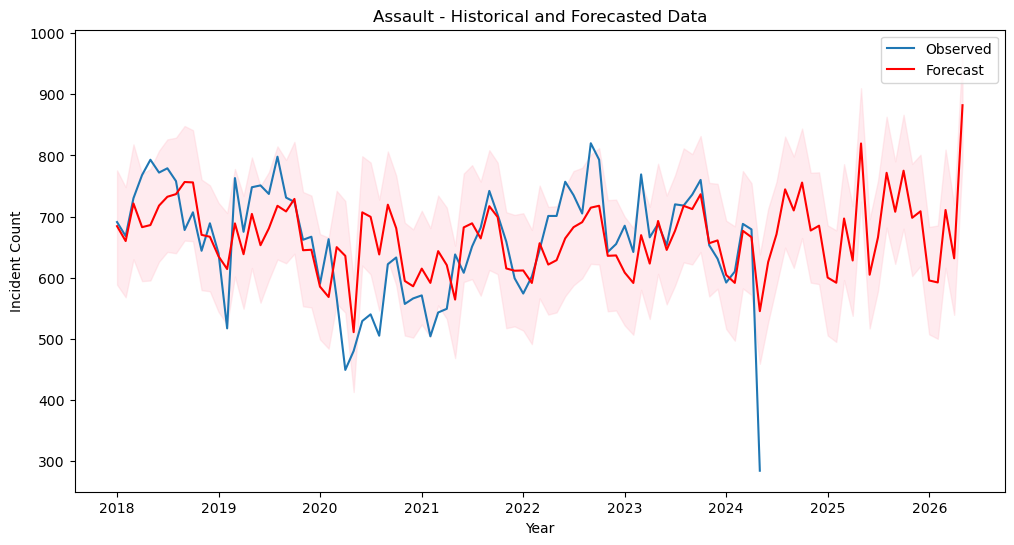

  0%|          | 0/7 [00:00<?, ?it/s]

20:29:21 - cmdstanpy - INFO - Chain [1] start processing
20:29:26 - cmdstanpy - INFO - Chain [1] done processing
20:29:26 - cmdstanpy - INFO - Chain [1] start processing
20:29:33 - cmdstanpy - INFO - Chain [1] done processing
20:29:33 - cmdstanpy - INFO - Chain [1] start processing
20:29:33 - cmdstanpy - INFO - Chain [1] done processing
20:29:33 - cmdstanpy - INFO - Chain [1] start processing
20:29:33 - cmdstanpy - INFO - Chain [1] done processing
20:29:33 - cmdstanpy - INFO - Chain [1] start processing
20:29:33 - cmdstanpy - INFO - Chain [1] done processing
20:29:33 - cmdstanpy - INFO - Chain [1] start processing
20:29:34 - cmdstanpy - INFO - Chain [1] done processing
20:29:34 - cmdstanpy - INFO - Chain [1] start processing
20:29:34 - cmdstanpy - INFO - Chain [1] done processing
20:29:34 - cmdstanpy - INFO - Chain [1] start processing
20:29:34 - cmdstanpy - INFO - Chain [1] done processing


     horizon         mae           mse      mape
0    79 days  139.568105  33788.718178  0.229322
1    81 days  147.362915  35171.092922  0.245824
2    85 days  146.507341  35021.510128  0.246983
3    86 days  126.997625  23005.895174  0.206078
4    90 days  131.796127  23849.162389  0.213722
..       ...         ...           ...       ...
148 719 days  200.857314  54890.238946  0.281569
149 723 days  210.127680  58719.234591  0.297745
150 724 days  224.252378  62819.145651  0.318086
151 728 days  209.746283  54378.994404  0.303804
152 730 days  214.307007  57889.666887  0.368219

[153 rows x 4 columns]


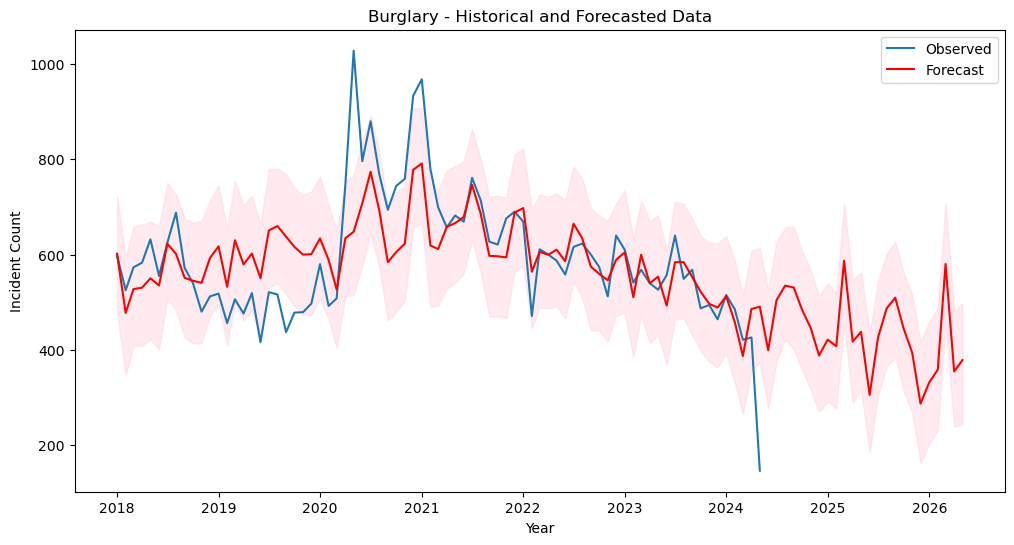

  0%|          | 0/7 [00:00<?, ?it/s]

20:29:34 - cmdstanpy - INFO - Chain [1] start processing
20:29:40 - cmdstanpy - INFO - Chain [1] done processing
20:29:40 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing
20:29:48 - cmdstanpy - INFO - Chain [1] start processing


     horizon         mae            mse      mape
0    79 days  203.074280   57669.298234  0.326226
1    81 days  184.810800   51979.046842  0.281656
2    85 days  165.772418   44273.437294  0.241065
3    86 days  141.540477   29913.578763  0.211547
4    90 days  152.985357   34131.202964  0.241937
..       ...         ...            ...       ...
148 719 days  393.044686  208864.777854  0.687730
149 723 days  415.877329  239030.803068  0.743025
150 724 days  431.263735  248069.976533  0.775098
151 728 days  408.464288  222872.582406  0.745373
152 730 days  431.238624  252060.130059  1.047220

[153 rows x 4 columns]


20:29:49 - cmdstanpy - INFO - Chain [1] done processing


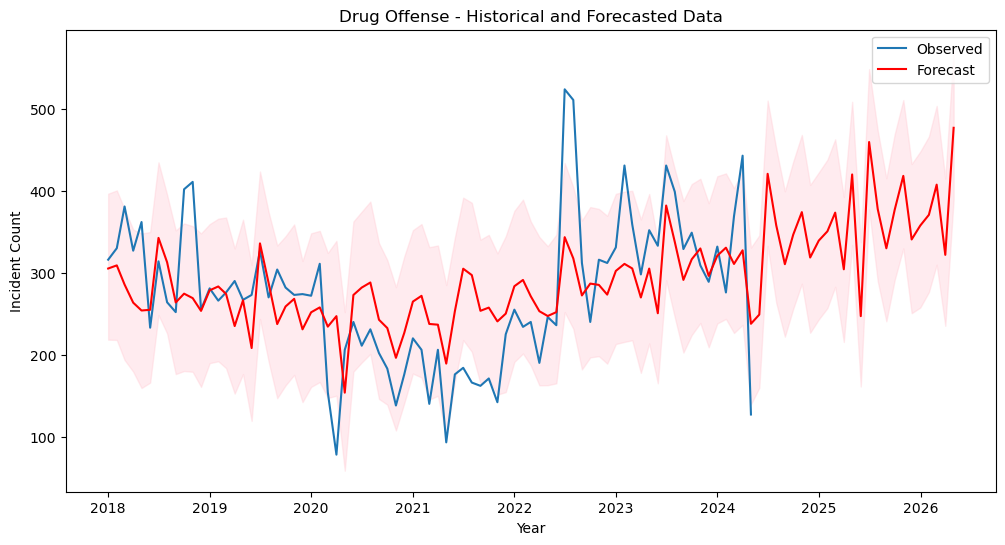

  0%|          | 0/7 [00:00<?, ?it/s]

20:29:49 - cmdstanpy - INFO - Chain [1] start processing
20:29:50 - cmdstanpy - INFO - Chain [1] done processing
20:29:50 - cmdstanpy - INFO - Chain [1] start processing
20:29:57 - cmdstanpy - INFO - Chain [1] done processing
20:29:57 - cmdstanpy - INFO - Chain [1] start processing
20:29:57 - cmdstanpy - INFO - Chain [1] done processing
20:29:57 - cmdstanpy - INFO - Chain [1] start processing
20:29:57 - cmdstanpy - INFO - Chain [1] done processing
20:29:57 - cmdstanpy - INFO - Chain [1] start processing
20:29:57 - cmdstanpy - INFO - Chain [1] done processing
20:29:57 - cmdstanpy - INFO - Chain [1] start processing
20:29:58 - cmdstanpy - INFO - Chain [1] done processing
20:29:58 - cmdstanpy - INFO - Chain [1] start processing
20:29:58 - cmdstanpy - INFO - Chain [1] done processing
20:29:58 - cmdstanpy - INFO - Chain [1] start processing
20:29:58 - cmdstanpy - INFO - Chain [1] done processing


     horizon         mae           mse      mape
0    79 days   94.633320  16628.350504  0.339961
1    81 days   94.674716  16637.179942  0.344566
2    85 days   79.915723  13087.070673  0.290866
3    86 days   76.852110  12868.003345  0.279407
4    90 days   75.693886  12649.657479  0.265345
..       ...         ...           ...       ...
148 719 days  237.229259  73897.446212  1.022865
149 723 days  242.250437  75462.991050  1.016996
150 724 days  253.959341  80628.635644  1.039744
151 728 days  254.148601  80712.939074  1.040787
152 730 days  238.576782  75085.804078  1.015256

[153 rows x 4 columns]


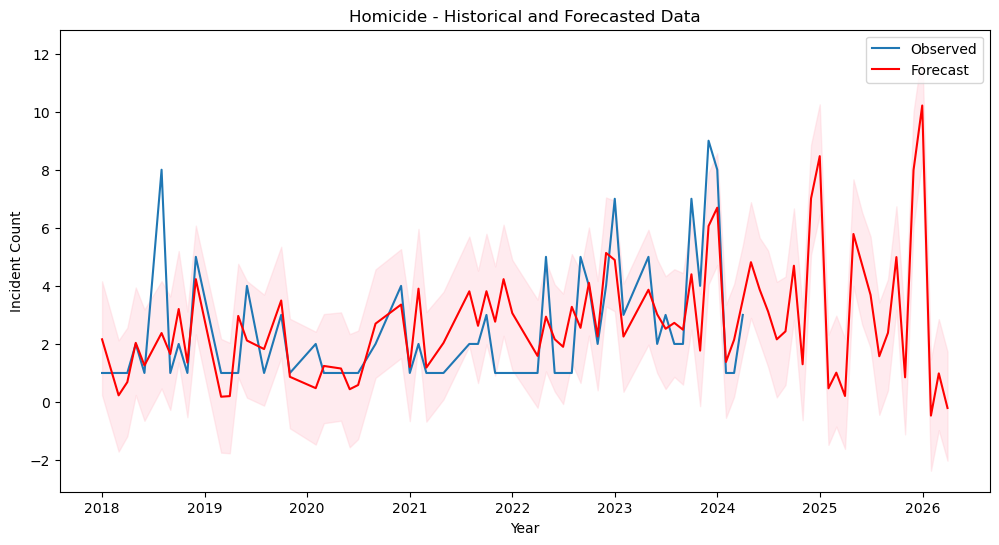

  0%|          | 0/7 [00:00<?, ?it/s]

20:29:58 - cmdstanpy - INFO - Chain [1] start processing
20:29:59 - cmdstanpy - INFO - Chain [1] done processing
20:29:59 - cmdstanpy - INFO - Chain [1] start processing
20:29:59 - cmdstanpy - INFO - Chain [1] done processing
20:29:59 - cmdstanpy - INFO - Chain [1] start processing
20:30:03 - cmdstanpy - INFO - Chain [1] done processing
20:30:03 - cmdstanpy - INFO - Chain [1] start processing
20:30:03 - cmdstanpy - INFO - Chain [1] done processing
20:30:03 - cmdstanpy - INFO - Chain [1] start processing
20:30:03 - cmdstanpy - INFO - Chain [1] done processing
20:30:03 - cmdstanpy - INFO - Chain [1] start processing
20:30:03 - cmdstanpy - INFO - Chain [1] done processing
20:30:03 - cmdstanpy - INFO - Chain [1] start processing
20:30:03 - cmdstanpy - INFO - Chain [1] done processing
20:30:03 - cmdstanpy - INFO - Chain [1] start processing
20:30:03 - cmdstanpy - INFO - Chain [1] done processing


     horizon       mae         mse      mape
0    80 days  6.663216  214.461036  5.816043
1    84 days  6.581333  214.333750  5.734160
2    89 days  6.496350  214.077275  5.649177
3    90 days  6.233561  212.735988  5.386389
4   105 days  6.828139  217.252858  5.980967
..       ...       ...         ...       ...
108 717 days  4.214399   46.549451  2.365267
109 719 days  2.985955   23.297681  1.838265
110 722 days  1.953622    7.972724  1.296505
111 727 days  1.774883    5.582241  0.716720
112 730 days  1.824340    5.727255  0.733205

[113 rows x 4 columns]


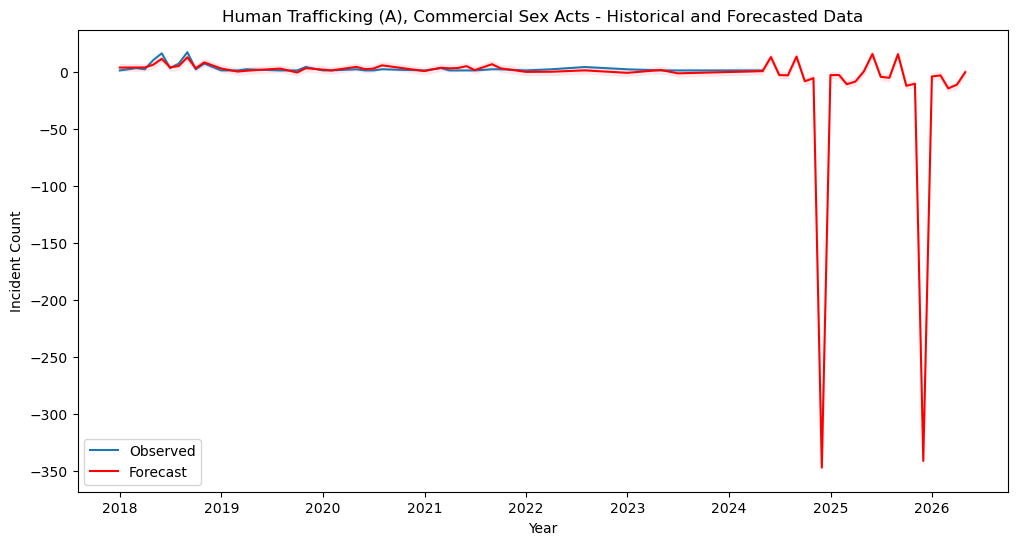

  0%|          | 0/7 [00:00<?, ?it/s]

20:30:03 - cmdstanpy - INFO - Chain [1] start processing
20:30:04 - cmdstanpy - INFO - Chain [1] done processing
20:30:04 - cmdstanpy - INFO - Chain [1] start processing
20:30:05 - cmdstanpy - INFO - Chain [1] done processing
20:30:05 - cmdstanpy - INFO - Chain [1] start processing
20:30:12 - cmdstanpy - INFO - Chain [1] done processing
20:30:12 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
# Data Preprocessing and Aggregation
# Convert columns to appropriate data types
df_forecast['Incident Year'] = df_forecast['Incident Year'].astype(int)
df_forecast['Incident Date'] = pd.to_datetime(df_forecast['Incident Date'], errors='coerce')
df_forecast['Incident Category'] = df_forecast['Incident Category'].astype(str)

# Filter data starting from January 2018
df_forecast = df_forecast[df_forecast['Incident Date'] >= '2018-01-01']

# Check for and handle missing or incorrect dates
df_forecast = df_forecast.dropna(subset=['Incident Date'])

# Create a 'date' column
df_forecast['date'] = df_forecast['Incident Date'].dt.to_period('M').dt.to_timestamp()

# Aggregate data by date and incident category, summing the counts
aggregated_data = df_forecast.groupby(['date', 'Incident Category']).size().reset_index(name='count')

def forecast_category(aggregated_data, category):
    category_data = aggregated_data[aggregated_data['Incident Category'] == category]
    ts_data = category_data[['date', 'count']].rename(columns={'date': 'ds', 'count': 'y'})

    # Check if there is enough data (at least 12 data points)
    if len(ts_data) < 12:
        print(f"Not enough data to model category: {category}")
        return

    model = Prophet()
    model.fit(ts_data)
    future = model.make_future_dataframe(periods=24, freq='M')
    forecast = model.predict(future)

    plt.figure(figsize=(12, 6))
    plt.plot(ts_data['ds'], ts_data['y'], label='Observed')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='r')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
    plt.title(f'{category} - Historical and Forecasted Data')
    plt.xlabel('Year')
    plt.ylabel('Incident Count')
    plt.legend()
    plt.savefig(f'{category}_forecast.png')
    plt.show()
    
    return model

def evaluate_model(model, ts_data):
    # Perform cross-validation
    df_cv = cross_validation(model, initial='366 days', period='180 days', horizon='730 days')
    
    # Calculate performance metrics
    df_performance = performance_metrics(df_cv)
    
    print(df_performance[['horizon', 'mae', 'mse', 'mape']])
    
    return df_cv, df_performance

# Example usage
# Identify all unique incident categories
categories = aggregated_data['Incident Category'].unique()

for category in categories:
    model = forecast_category(aggregated_data, category)
    if model is not None:
        ts_data = aggregated_data[aggregated_data['Incident Category'] == category][['date', 'count']].rename(columns={'date': 'ds', 'count': 'y'})
        df_cv, df_performance = evaluate_model(model, ts_data)